In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [86]:
import tushare as ts

pro = ts.pro_api('37176e7dc75a91547dd75fd040f6d3fb9dd59bcf63fe87a4ae8b8cb6')
df = pro.daily(ts_code='601318.SH', start_date='20090101', end_date='20190419')

In [89]:
# Sort DataFrame by date
df = df.sort_values('trade_date').reset_index()

# Double check the result
df.head()

,index,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,2440,601318.SH,20090105,27.90,28.97,27.60,28.85,26.59,2.26,8.50,351053.50,990720.326
1,2439,601318.SH,20090106,28.70,30.37,28.63,29.86,28.85,1.01,3.50,451975.71,1349920.975
2,2438,601318.SH,20090107,29.77,30.21,29.35,29.87,29.86,0.01,0.03,306279.49,915325.446
3,2437,601318.SH,20090108,28.80,29.05,28.05,28.34,29.87,-1.53,-5.12,329273.23,939824.785
4,2436,601318.SH,20090109,28.25,29.15,28.25,28.41,28.34,0.07,0.25,235815.68,676914.662


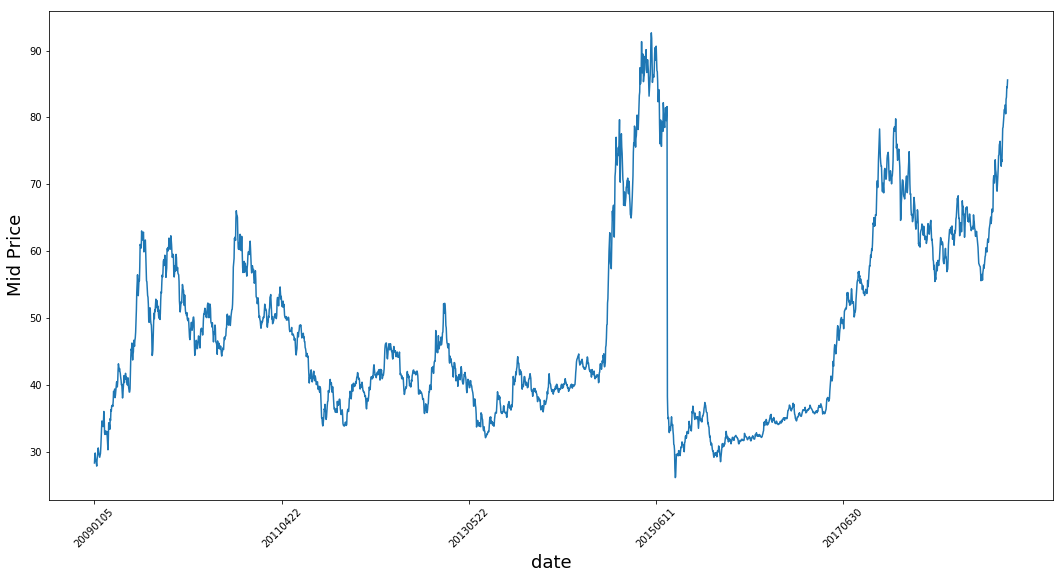

In [91]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]), (df['low']+df['high'])/2)
plt.xticks(range(0,df.shape[0],500),df['trade_date'].loc[::500],rotation=45)
plt.xlabel('date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [92]:
df['mid'] = (df['high'] + df['low'])/2

In [93]:
mid_prices = df['mid'].values.reshape(-1,1)

In [94]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
mid_prices_scaled = sc.fit_transform(mid_prices)

In [95]:
train_size = int(len(mid_prices_scaled) * 0.80)
test_size = len(mid_prices_scaled) - train_size
train, test = mid_prices_scaled[0:train_size,:], mid_prices_scaled[train_size:len(mid_prices_scaled),:]
print(len(train), len(test))

1952 489


In [96]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [97]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [98]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [99]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout

In [100]:
# Initialising the RNN
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('relu'))

model.compile(loss='mse', optimizer='Adam')

c:\users\kai\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
c:\users\kai\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  import sys
c:\users\kai\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [102]:
model.fit(trainX, trainY, epochs=100, batch_size=5)

Epoch 1/100
1950/1950 [==============================] - 1s 295us/step - loss: 0.0028
Epoch 2/100
1950/1950 [==============================] - 1s 297us/step - loss: 0.0011
Epoch 3/100
1950/1950 [==============================] - 1s 307us/step - loss: 0.0010
Epoch 4/100
1950/1950 [==============================] - 1s 290us/step - loss: 0.0011
Epoch 5/100
1950/1950 [==============================] - 1s 292us/step - loss: 0.0011
Epoch 6/100
1950/1950 [==============================] - 1s 292us/step - loss: 0.0011
Epoch 7/100
1950/1950 [==============================] - 1s 298us/step - loss: 8.0366e-04
Epoch 8/100
1950/1950 [==============================] - 1s 292us/step - loss: 8.2266e-04
Epoch 9/100
1950/1950 [==============================] - 1s 292us/step - loss: 8.2503e-04
Epoch 10/100
1950/1950 [==============================] - 1s 292us/step - loss: 8.2847e-04
Epoch 11/100
1950/1950 [==============================] - 1s 308us/step - loss: 8.0108e-04
Epoch 12/100
1950/1950 [========

Epoch 91/100
1950/1950 [==============================] - 1s 312us/step - loss: 8.0304e-04
Epoch 92/100
1950/1950 [==============================] - 1s 329us/step - loss: 8.0861e-04
Epoch 93/100
1950/1950 [==============================] - 1s 319us/step - loss: 7.8692e-04
Epoch 94/100
1950/1950 [==============================] - 1s 307us/step - loss: 6.6471e-04
Epoch 95/100
1950/1950 [==============================] - 1s 315us/step - loss: 6.7827e-04
Epoch 96/100
1950/1950 [==============================] - 1s 311us/step - loss: 7.3575e-04
Epoch 97/100
1950/1950 [==============================] - 1s 309us/step - loss: 7.0983e-04
Epoch 98/100
1950/1950 [==============================] - 1s 314us/step - loss: 6.4839e-04
Epoch 99/100
1950/1950 [==============================] - 1s 327us/step - loss: 6.9837e-04
Epoch 100/100
1950/1950 [==============================] - 1s 339us/step - loss: 6.3877e-04


In [103]:
model.predict(testX)

array([[0.14904828],
       [0.15224607],
       [0.15471955],
       [0.15785074],
       [0.17033552],
       [0.17993446],
       [0.1797877 ],
       [0.18345895],
       [0.18287127],
       [0.18088862],
       [0.1752412 ],
       [0.17744032],
       [0.180595  ],
       [0.19730005],
       [0.20905045],
       [0.21905784],
       [0.23080456],
       [0.22633952],
       [0.22113688],
       [0.22009721],
       [0.2258933 ],
       [0.24176541],
       [0.26407415],
       [0.25268078],
       [0.275195  ],
       [0.29177278],
       [0.3011397 ],
       [0.293207  ],
       [0.293962  ],
       [0.28061447],
       [0.2916973 ],
       [0.30598035],
       [0.3126428 ],
       [0.33388817],
       [0.34445906],
       [0.34019852],
       [0.33062112],
       [0.31196108],
       [0.3112037 ],
       [0.32667235],
       [0.3363965 ],
       [0.34035066],
       [0.35862628],
       [0.35230142],
       [0.36320126],
       [0.3537489 ],
       [0.34925497],
       [0.350

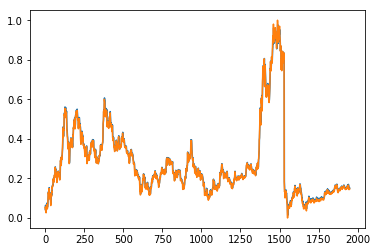

In [104]:
plt.plot(model.predict(trainX))
plt.plot(trainY)

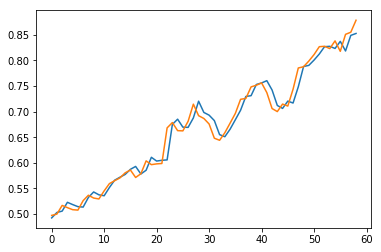

In [111]:
plt.plot(model.predict(testX)[-60:-1])
plt.plot(testY[-60:-1])